In [343]:

df = pd.read_csv('dados_steam/games.csv')

#### 5 JOGOS MAIS CAROS 

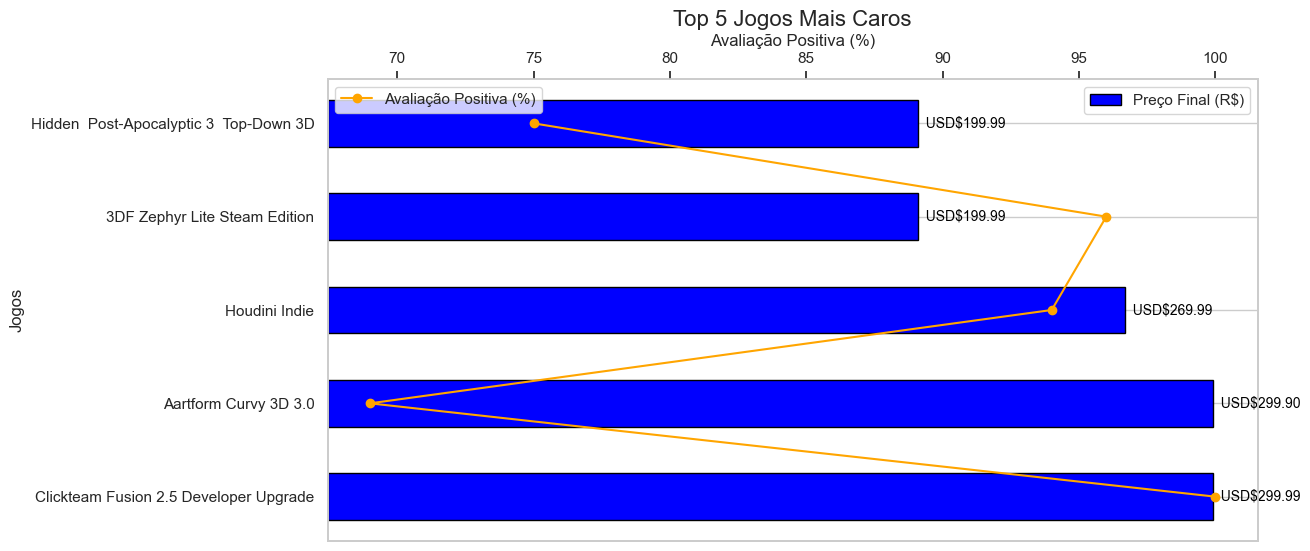

In [344]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dados_steam/games.csv')

expensive_games = df[(df['price_final'] >= 190)].sort_values(['price_final'], ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.5
bars = ax1.barh(expensive_games['title'], expensive_games['price_final'], bar_width, label='Preço Final (R$)', color='blue', edgecolor='black')

ax1.set_ylabel('Jogos')
ax1.set_xlabel('Preço Final (R$)')
ax1.set_title('Top 5 Jogos Mais Caros', fontsize=16)
ax1.legend(loc='upper right')

ax1.xaxis.set_visible(False)

ax2 = ax1.twiny()
line, = ax2.plot(expensive_games['positive_ratio'], expensive_games['title'], color='orange', marker='o', label='Avaliação Positiva (%)')

ax2.set_xlabel('Avaliação Positiva (%)')
ax2.legend(loc='upper left')

for bar, label in zip(bars, expensive_games['price_final']):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height() / 2, f'  USD${label:.2f}', ha='left', va='center', fontsize=10, color='black')

ax2.xaxis.grid(False)

ax1.set_facecolor('white')


plt.show()


#### TOP 5 JOGOS MAIS POPULARES DOS ULTIMOS 5 ANOS

In [345]:
import datetime

df['date_release']= pd.to_datetime(df['date_release'])


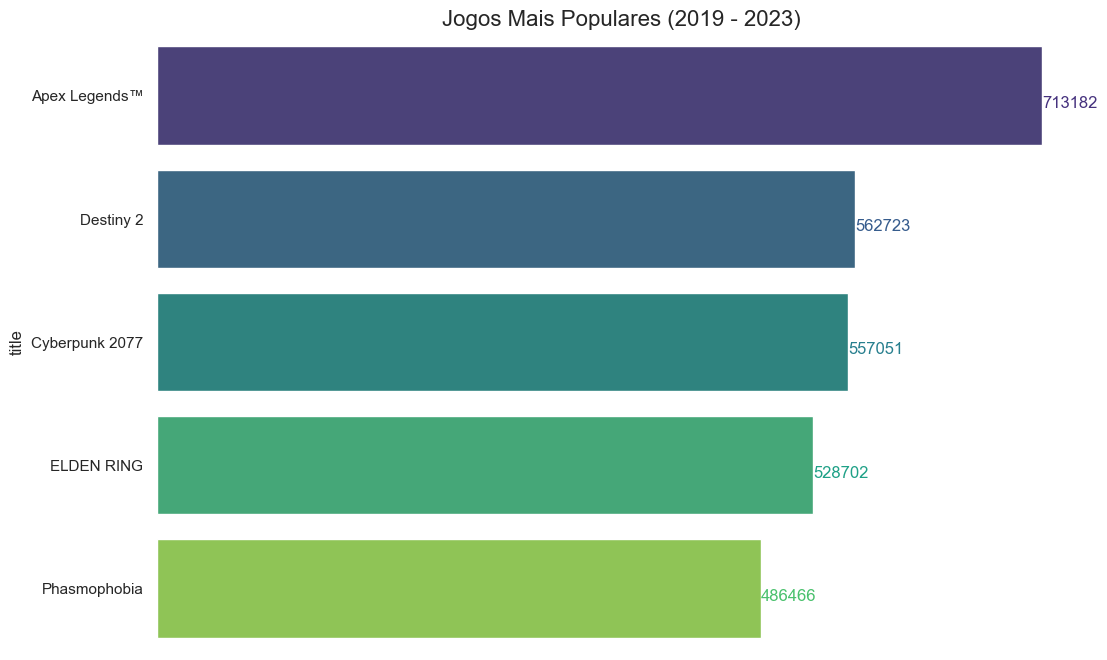

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dados = df.loc[(df['date_release'].dt.year >= 2019) & (df['date_release'].dt.year <= 2023)].sort_values(['user_reviews', 'positive_ratio'], ascending=[False, False]).head(5)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='user_reviews', y='title', hue='title', data=dados, palette='viridis', legend=False)

ax.xaxis.set_visible(False)  
ax.spines['bottom'].set_visible(False)  

for index, value in enumerate(dados['user_reviews']):
    ax.text(value + 1, index, f'{value}', color=sns.color_palette('viridis')[index], va='top', fontsize=12)


plt.title('Jogos Mais Populares (2019 - 2023)', fontsize=16)

sns.despine(left=True, bottom=True)  

plt.show()

#### TOP 5 JOGOS MAIS POPULARES NO MAC, WINDOWS E LINUX

In [347]:
mac=df.loc[(df['positive_ratio']>=90) & (df['mac']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head()
mac[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12711,Left 4 Dead 2,574470,97
47637,Unturned,515016,91


In [348]:
win=df.loc[(df['positive_ratio']>=90) & (df['win']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
win[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12800,The Witcher® 3: Wild Hunt,668455,96
47791,Wallpaper Engine,637341,98


In [349]:
linux=df.loc[(df['positive_ratio']>=90) & (df['linux']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
linux[['title','user_reviews','positive_ratio']]


,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12711,Left 4 Dead 2,574470,97
47637,Unturned,515016,91


#### PLATAFORMA MAIS COMPATIVEL COM OS JOGOS

In [350]:
game = (df['win']==True).value_counts()
game


win
True     50076
False      796
Name: count, dtype: int64

In [351]:
game = (df['mac']==True).value_counts()
game

mac
False    37854
True     13018
Name: count, dtype: int64

In [352]:
game = (df['linux']==True).value_counts()
game

linux
False    41831
True      9041
Name: count, dtype: int64

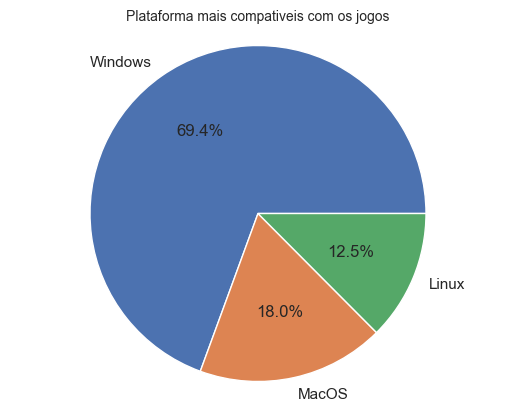

In [353]:
from matplotlib.patches import Shadow
import matplotlib.pyplot as plt
labels = 'Windows',"MacOS","Linux"
sizes = [50076,13018
,9041]
fig1,ax1 = plt.subplots()

ax1.pie(sizes,labels=labels,autopct='%1.1f%%')

ax1.set_title("Plataforma mais compativeis com os jogos",size=10)

ax1.axis('equal')
plt.show()

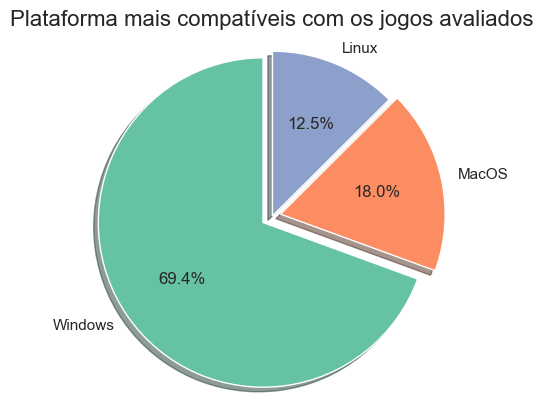

In [354]:
import matplotlib.pyplot as plt

labels = 'Windows', 'MacOS', 'Linux'
sizes = [50076, 13018, 9041]


colors = [(0.4, 0.7608, 0.6471), (0.9882, 0.5529, 0.3843), (0.5529, 0.6275, 0.7961)]


explode = (0.07, 0.05, 0)

fig1, ax1 = plt.subplots()


ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)


ax1.axis('equal')

ax1.set_title("Plataforma mais compatíveis com os jogos avaliados", size=16)

plt.show()


#### TOP 5 MENOS POPULARES DOS ULTIMOS 5 ANOS

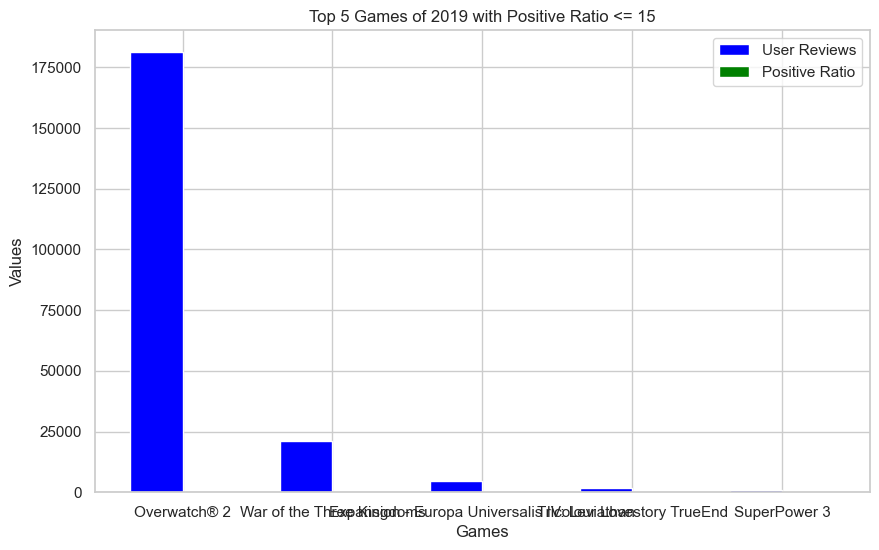

In [355]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('dados_steam/games.csv')

df['date_release'] = pd.to_datetime(df['date_release'])

dados = df.loc[(df['date_release'].dt.year >= 2019) & (df['positive_ratio'] <= 15)].sort_values(['user_reviews', 'positive_ratio'], ascending=[False, False]).head(5)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(dados))

bar1 = ax.bar(index, dados['user_reviews'], bar_width, label='User Reviews', color='blue')
bar2 = ax.bar(index + bar_width, dados['positive_ratio'], bar_width, label='Positive Ratio', color='green')

ax.set_title('Top 5 Games of 2019 with Positive Ratio <= 15')
ax.set_xlabel('Games')
ax.set_ylabel('Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dados['title'])
ax.legend()

plt.show()


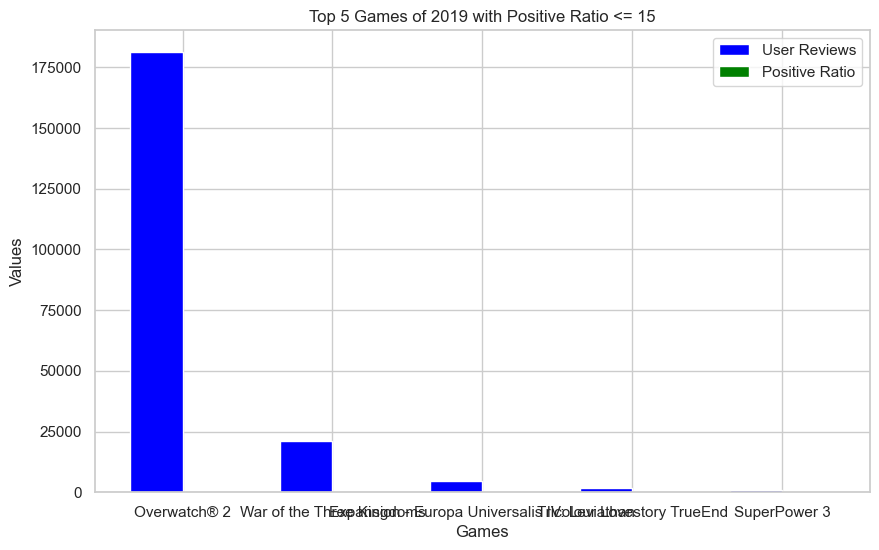

In [356]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('dados_steam/games.csv')

df['date_release'] = pd.to_datetime(df['date_release'])

dados = df.loc[(df['date_release'].dt.year >= 2019) & (df['positive_ratio'] <= 15)].sort_values(['user_reviews', 'positive_ratio'], ascending=[False, False]).head(5)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(dados))

bar1 = ax.bar(index, dados['user_reviews'], bar_width, label='User Reviews', color='blue')
bar2 = ax.bar(index + bar_width, dados['positive_ratio'], bar_width, label='Positive Ratio', color='green')

ax.set_title('Top 5 Games of 2019 with Positive Ratio <= 15')
ax.set_xlabel('Games')
ax.set_ylabel('Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dados['title'])
ax.legend()

plt.show()


In [357]:
import pandas as pd 
from matplotlib.patches import Shadow
import matplotlib.pyplot as plt
df = pd.read_csv('dados_steam/games.csv')


game = (df['win']==True).value_counts()
game

win
True     50076
False      796
Name: count, dtype: int64

In [358]:
game = (df['mac']==True).value_counts()
game

mac
False    37854
True     13018
Name: count, dtype: int64

#### TOP 3 JOGOS GRATIS MAIS BEM AVAILADOS

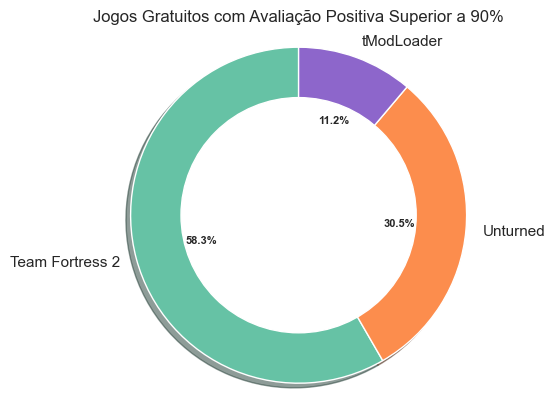

In [359]:
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st

dados = df.loc[(df['price_final'] == 0) & (df['positive_ratio'] >= 90)].sort_values(['user_reviews', 'positive_ratio'], ascending=[False, False]).head(3)


fig, ax = plt.subplots()


colors = [(0.4, 0.7608, 0.6471), (0.9882, 0.5529, 0.3000), (0.5529, 0.4000, 0.7961)]



wedges, texts, autotexts = ax.pie(dados['user_reviews'], labels=dados['title'], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)


plt.setp(autotexts, size=8, weight="bold")


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Jogos Gratuitos com Avaliação Positiva Superior a 90%')
plt.show()


#### TOP 3 JOGOS DA STEAM COM AVALIAÇÃO NEGATIVA

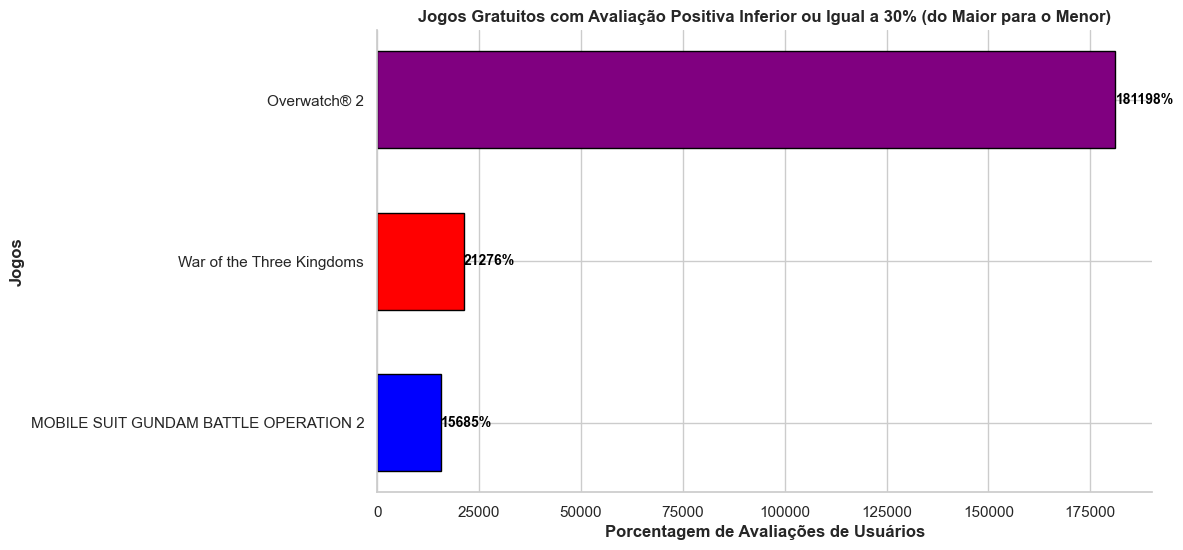

In [360]:
import matplotlib.pyplot as plt
import pandas as pd





dados = df.loc[(df['price_final'] == 0) & (df['positive_ratio'] <= 30)].sort_values(['user_reviews', 'positive_ratio'], ascending=[False, False]).head(3)


cores = ['blue', 'red', 'purple']


dados = dados.sort_values('user_reviews', ascending=True)


fig, ax = plt.subplots(figsize=(10, 6))


fig.patch.set_facecolor('white')
ax.set_facecolor('white')


bars = ax.barh(dados['title'], dados['user_reviews'], color=cores, edgecolor='black', height=0.6)


for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width}%', ha='left', va='center', color='black', fontweight='bold', fontsize=10)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Porcentagem de Avaliações de Usuários', fontweight='bold')  
ax.set_ylabel('Jogos', fontweight='bold')  
ax.set_title('Jogos Gratuitos com Avaliação Positiva Inferior ou Igual a 30% (do Maior para o Menor)', fontweight='bold')  

plt.show()


In [361]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True
